# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [ ]:
from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


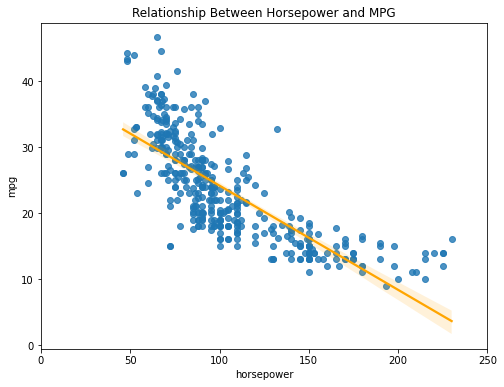

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, of a regression model. The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data.
- We're looking at our loss function (min of cost function)
- can help us describe gradient descent
- graph of loss function/cost function for linear regression


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)

- Start by taking a random guess
- we start at the upper left and take steps down our gradient to find our minimum
- move in the opposite direction of the gradient
- take multiple steps until we get close to a gradient of zero (minimum)
- how do we get our gradient? - we get the partial derivatives (slope of the tangent of the curve for one variable)
- tangent of cost function

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- **step-size:** how far we move down our cost function
- Similar to finding the line of best fit in linear regression, the goal of gradient descent is to minimize the cost function, or the error between predicted and actual y. In order to do this, it requires two data points—a direction and a learning rate. These factors determine the partial derivative calculations of future iterations, allowing it to gradually arrive at the local or global minimum (i.e. point of convergence).
- **Learning rate** (also referred to as step size or the alpha) is the size of the steps that are taken to reach the minimum. This is typically a small value, and it is evaluated and updated based on the behavior of the cost function. 
    - High learning rates result in larger steps (less amount of steps) but risks overshooting the minimum. 
    - Conversely, a low learning rate has small step sizes. While it has the advantage of more precision, the number of iterations compromises overall efficiency as this takes more time and computations to reach the minimum.
    - learning rate is the proportion of the gradient we use to calculate step size
    - step size is proportional to the size of the gradient at our current estimate
    - step size changes, gets smaller as we get closer to our minimum, by design
    - too large of a step size: we can overshoot, bounce over our minimum
    - too small of a step size: we can undershoot, it will take us too long, too many steps needed to reach minimum
- **The cost (or loss) function** measures the difference, or error, between actual y and predicted y at its current position. This improves the machine learning model's efficacy by providing feedback to the model so that it can adjust the parameters to minimize the error and find the local or global minimum. It continuously iterates, moving along the direction of steepest descent (or the negative gradient) until the cost function is close to or at zero. 
    - At this point, the model will stop learning. 
    - Additionally, while the terms, cost function and loss function, are considered synonymous, there is a slight difference between them. It’s worth noting that a loss function refers to the error of one training example, while a cost function calculates the average error across an entire training set.


- **Batch gradient descent** sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch.
    - While this batching provides computation efficiency, it can still have a long processing time for large training datasets as it still needs to store all of the data into memory. Batch gradient descent also usually produces a stable error gradient and convergence, but sometimes that convergence point isn’t the most ideal, finding the local minimum versus the global one.
        

- **Stochastic gradient descent (SGD)** runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. Since you only need to hold one training example, they are easier to store in memory. While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one


- **Mini-batch gradient descent** combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent.

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable (Classification)
- the predictions that a log regression outputs is probability of the classes via the log odds, and logit/sigmoid
- its different from the linear regression bc its binary.
    - linear regression predicts continuous values
- it is a parametric model becasue it is optimizing for our coefficients (weights)
    - it uses linear equation so it has betas (aka weights = parameters)
    - hy = b0 + x1b1 + x2b2 + x3b3


- **Logistic regression** is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. 
    - It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data. It learns a linear relationship from the given dataset and then introduces a non-linearity in the form of the Sigmoid function.
    - Logistic regression is also known as Binomial logistics regression. It is based on sigmoid function where output is probability and input can be from -infinity to +infinity.

**Bonus question**
When would we consider using a non-parametric model over a logistic regression?

- when features are not linear with our target
- high dimentionality data, sparse data (lots of 0s and 1s)

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

In comparison to decision trees
- More granular predict_proba method, can be more insightful/inferential
- have direct interpretation of our coefficients

In comparison to linear regression
- Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.One may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios.
- n Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

Logistic regression
- won't work as well on high dimentionality data
- less prone to over-fitting bc it incorporates regularization by default
- in comparison to some other models, it won't handel class imbalance well. 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [7]:
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

In [8]:
# Train-test split
# Set test_size=0.33 and random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [15]:
# Scale the data
ss = StandardScaler()
# ss.fit(X_train) and then ss.transform(X_train)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [10]:
# Code to explore

y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [12]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Lot more negatives than positives, class inbalance


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- DummyClassifier(strategy='most_frequent')
- predict the most common, always predict class 0


#### Part 3: How accurate would that baseline be on test data?


In [13]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- accuracy of that baseline would be ~75% (very misleadig)


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- Model, when training, isn't seeing enough data from our minority class to predict it well. Fitting to the majority class more
- SMOTE: synthetic minority oversampling technique creates synthetic (artificial) datapoints to oversample the minority class. 
    - Could also potentially undersample the majority (only if we have a ton of data)
- instead of oversample or undersample, we would use class_weights hyperparameter ('balanced') which most sklearn functions have


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [16]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

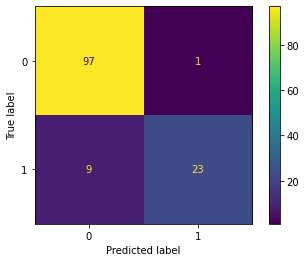

In [17]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_sc, y_test);


### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [18]:
y_pred_test = logreg.predict(X_test_sc)

In [19]:
# Accuracy
accuracy_score(y_test, y_pred_test)

0.9230769230769231

In [32]:
# Precision
"""
The precision is intuitively the ability of the classifier 
not to label as positive a sample that is negative.

tp / (tp + fp)
"""
precision_score(y_test, y_pred_test)

0.9583333333333334

In [21]:
# Recall
recall_score(y_test, y_pred_test)

0.71875

In [22]:
# F1-Score
f1_score(y_test, y_pred_test)

0.8214285714285714

f1 score is the harmonic mean of the precision and recall
 - 2 * (prcesion * recall) / (precision + recall)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [25]:
y_pred_test_probs = logreg.predict_proba(X_test_sc)
y_pred_test_probs

array([[9.97117884e-01, 2.88211554e-03],
       [9.95334221e-01, 4.66577929e-03],
       [9.99860889e-01, 1.39110635e-04],
       [9.97699595e-01, 2.30040460e-03],
       [9.99634518e-01, 3.65481656e-04],
       [9.99043618e-01, 9.56382448e-04],
       [2.79904115e-03, 9.97200959e-01],
       [9.99026897e-01, 9.73103080e-04],
       [9.33336333e-01, 6.66636668e-02],
       [9.99464221e-01, 5.35778541e-04],
       [8.93497133e-03, 9.91065029e-01],
       [9.57162834e-01, 4.28371664e-02],
       [1.54609949e-01, 8.45390051e-01],
       [9.98638756e-01, 1.36124411e-03],
       [9.11830111e-01, 8.81698888e-02],
       [9.99686066e-01, 3.13933548e-04],
       [9.39695786e-01, 6.03042137e-02],
       [9.99734687e-01, 2.65313401e-04],
       [9.99421021e-01, 5.78978925e-04],
       [9.99475392e-01, 5.24607746e-04],
       [8.74667951e-01, 1.25332049e-01],
       [9.99923819e-01, 7.61806157e-05],
       [9.99914240e-01, 8.57600530e-05],
       [1.32938166e-01, 8.67061834e-01],
       [9.993896

In [26]:
# the scores must be the scores of the class with the greater label (positive label)
# grabbing all the rows and second column
# first column is probability of class 0, and second is probability of class 1
y_hat = y_pred_test_probs[:, 1]
y_hat

array([2.88211554e-03, 4.66577929e-03, 1.39110635e-04, 2.30040460e-03,
       3.65481656e-04, 9.56382448e-04, 9.97200959e-01, 9.73103080e-04,
       6.66636668e-02, 5.35778541e-04, 9.91065029e-01, 4.28371664e-02,
       8.45390051e-01, 1.36124411e-03, 8.81698888e-02, 3.13933548e-04,
       6.03042137e-02, 2.65313401e-04, 5.78978925e-04, 5.24607746e-04,
       1.25332049e-01, 7.61806157e-05, 8.57600530e-05, 8.67061834e-01,
       6.10344912e-04, 3.70596692e-03, 3.16963718e-02, 3.55067473e-01,
       7.97034531e-04, 8.03000867e-03, 9.47397282e-01, 2.14512246e-02,
       2.14283145e-01, 5.59151712e-04, 9.81588597e-01, 6.04199292e-05,
       9.65393863e-01, 2.39633260e-03, 9.66323397e-01, 9.99312202e-01,
       9.25243170e-01, 1.12718485e-03, 5.35187366e-05, 1.74465054e-03,
       9.67079081e-01, 9.98817896e-01, 2.81251779e-01, 1.54823217e-04,
       3.73172409e-03, 3.01269772e-04, 9.81312227e-01, 9.71495990e-03,
       7.19653335e-03, 1.70555661e-04, 4.01109500e-03, 3.35217499e-01,
      

In [29]:
# Calculate roc-auc
# how likely we are to predict both points
roc_auc_score(y_test, y_hat)

0.9811862244897959

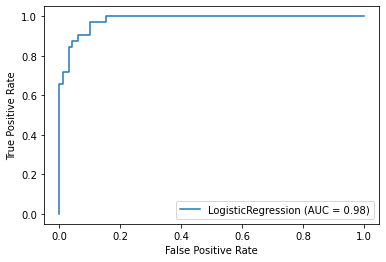

In [31]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_sc, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

In [33]:
logreg.score(X_train_sc, y_train)

0.950381679389313

In [34]:
logreg.score(X_test_sc, y_test)

0.9230769230769231

#### Answer:

- AUC close to 1 (Doing pretty good), precision is higher than recall, doing better 
- Acc and precision are very high, recall is somewhat lower. 
- Our model is better at making false negative predictions. (more FN than FP)
    - recall is it's the total correct positives over total positive guesses (tp/ (tp+fn))
    - precision is tp / (tp + fp)
- our testing score is slightly lower than training, just a little overfit


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [35]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

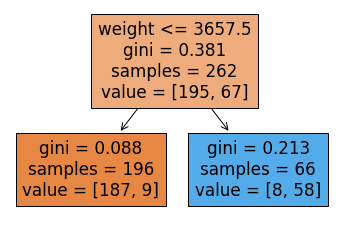

In [36]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

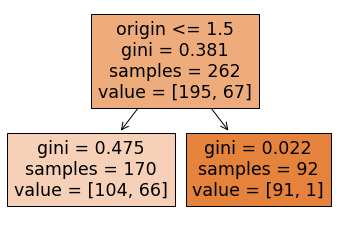

In [37]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Version 1 is better bcause our nodes are more pure.
- The first tree, splitting on weight, produces the better split
- looking at gini scores for both child nodes, first tree is lower gini score, hence more pure.


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [40]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
"""
if we prune we might overfit so will leave it.

Also don't use scaled data since scaling has no effect on a decision tree
"""

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

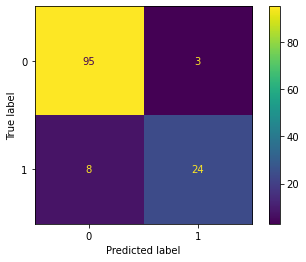

In [42]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test);

In [ ]:
plot_tree(dt, ax =ax)

In [46]:
dt_tuned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

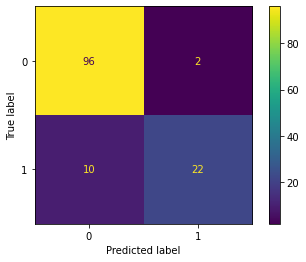

In [47]:
plot_confusion_matrix(dt_tuned, X_test, y_test)

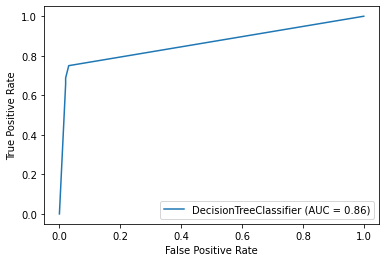

In [48]:
plot_roc_curve(dt_tuned, X_test, y_test);

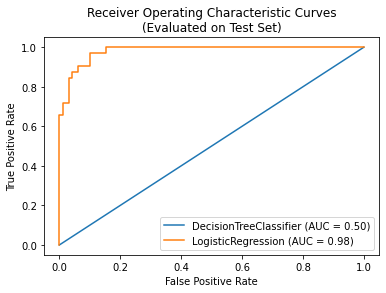

In [45]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_sc, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- logistic regression is the better model becasuse it has a higher AUC (score)
